In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:

import numpy as np
X = np.genfromtxt ('X32.csv', delimiter=",")
y = np.genfromtxt ('y32.csv', delimiter=",")

print X.shape

X = X.reshape(2000, 3, 32, 32).transpose(0,2,3,1).astype("float")
#X = a.reshape(349,3,32,32).swapaxes(0,2)
print X.shape

(2000, 3072)
(2000, 32, 32, 3)


In [3]:
def get_CIFAR10_data(num_training=1200, num_validation=400, num_test=400):
  """
  Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
  it for the linear classifier. These are the same steps as we used for the
  SVM, but condensed to a single function.  
  """
  # Load the raw CIFAR-10 data
  cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
  #X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
  
  
  X_train = X[0:1600]
  y_train = y[0:1600]
  X_test = X[1600:]
  y_test = y[1600:]

  print 'Training data shape: ', X_train.shape
  print 'Training labels shape: ', y_train.shape
  print 'Test data shape: ', X_test.shape
  print 'Test labels shape: ', y_test.shape

  # subsample the data
  mask = range(num_training, num_training + num_validation)
  X_val = X_train[mask]
  y_val = y_train[mask]
  mask = range(num_training)
  X_train = X_train[mask]
  y_train = y_train[mask]
  mask = range(num_test)
  X_test = X_test[mask]
  y_test = y_test[mask]
  
  # Preprocessing: reshape the image data into rows
  X_train = np.reshape(X_train, (X_train.shape[0], -1))
  X_val = np.reshape(X_val, (X_val.shape[0], -1))
  X_test = np.reshape(X_test, (X_test.shape[0], -1))
  
  # Normalize the data: subtract the mean image
  mean_image = np.mean(X_train, axis = 0)
  X_train -= mean_image
  X_val -= mean_image
  X_test -= mean_image
  
  # add bias dimension and transform into columns
  X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))]).T
  X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))]).T
  X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))]).T
  
  return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
#y_train[:400] = 0
#y_train[800:1200] = 1
y_test[0:100] = 1;
y_test[300:] = 0;
y_val[0:50] = 1;
y_val[350:] = 0;
print 'Train data shape: ', X_train.shape
print 'Train labels shape: ', y_train.shape
print 'Validation data shape: ', X_val.shape
print 'Validation labels shape: ', y_val.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape

Training data shape:  (1600, 32, 32, 3)
Training labels shape:  (1600,)
Test data shape:  (400, 32, 32, 3)
Test labels shape:  (400,)
Train data shape:  (3073, 1200)
Train labels shape:  (1200,)
Validation data shape:  (3073, 400)
Validation labels shape:  (400,)
Test data shape:  (3073, 400)
Test labels shape:  (400,)


In [4]:
# First implement the naive softmax loss function with nested loops.
# Open the file cs231n/classifiers/softmax.py and implement the
# softmax_loss_naive function.

from cs231n.classifiers.softmax import softmax_loss_naive
import time

# Generate a random softmax weight matrix and use it to compute the loss.
W = np.random.randn(10, 3073) * 0.0001
loss, grad = softmax_loss_naive(W, X_train, y_train, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print 'loss: %f' % loss
print 'sanity check: %f' % (-np.log(0.1))

cs231n/classifiers/softmax.py:45: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  loss += -f_i[y[i]] + np.log(sum_i)


loss: 2.438260
sanity check: 2.302585


In [5]:
# Complete the implementation of softmax_loss_naive and implement a (naive)
# version of the gradient that uses nested loops.
loss, grad = softmax_loss_naive(W, X_train, y_train, 0.0)

# As we did for the SVM, use numeric gradient checking as a debugging tool.
# The numeric gradient should be close to the analytic gradient.
from cs231n.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, X_train, y_train, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

numerical: 0.280803 analytic: 0.280802, relative error: 6.158515e-08
numerical: -0.986748 analytic: -0.986748, relative error: 1.161441e-07
numerical: 0.828909 analytic: 0.828909, relative error: 9.443423e-08
numerical: 26.799676 analytic: 26.799676, relative error: 3.010466e-09
numerical: -2.264449 analytic: -2.264448, relative error: 5.557613e-08
numerical: -17.485060 analytic: -17.485060, relative error: 6.162827e-09
numerical: 28.493667 analytic: 28.493668, relative error: 9.606591e-09
numerical: -1.147677 analytic: -1.147677, relative error: 4.586164e-08
numerical: 13.332838 analytic: 13.332838, relative error: 1.820432e-09
numerical: 0.313850 analytic: 0.313850, relative error: 1.827293e-07


In [6]:
print y.astype(int)

[0 1 1 ..., 1 0 1]


In [7]:
# Now that we have a naive implementation of the softmax loss function and its gradient,
# implement a vectorized version in softmax_loss_vectorized.
# The two versions should compute the same results, but the vectorized version should be
# much faster.
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_train, y_train, 0.00001)
toc = time.time()
print 'naive loss: %e computed in %fs' % (loss_naive, toc - tic)

from cs231n.classifiers.softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_train, y_train.astype(int), 0.00001)
toc = time.time()
print 'vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic)

# As we did for the SVM, we use the Frobenius norm to compare the two versions
# of the gradient.
grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print 'Loss difference: %f' % np.abs(loss_naive - loss_vectorized)
print 'Gradient difference: %f' % grad_difference

naive loss: 2.438260e+00 computed in 0.231636s
vectorized loss: 9.534754e+00 computed in 0.018360s
Loss difference: 7.096493
Gradient difference: 0.000000


In [8]:
# Use the validation set to tune hyperparameters (regularization strength and
# learning rate). You should experiment with different ranges for the learning
# rates and regularization strengths; if you are careful you should be able to
# get a classification accuracy of over 0.35 on the validation set.
from cs231n.classifiers import Softmax
results = {}
best_val = -1
best_softmax = None
learning_rates = np.logspace(-10, 10, 10) # np.logspace(-10, 10, 8) #-10, -9, -8, -7, -6, -5, -4
regularization_strengths = np.logspace(-3, 6, 10) # causes numeric issues: np.logspace(-5, 5, 8) #[-4, -3, -2, -1, 1, 2, 3, 4, 5, 6]

################################################################################
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained softmax classifer in best_softmax.                          #
################################################################################
iters = 10 #100
for lr in learning_rates:
    for rs in regularization_strengths:
        softmax = Softmax()
        softmax.train(X_train, y_train.astype(int), learning_rate=lr, reg=rs, num_iters=iters)
        
        y_train_pred = softmax.predict(X_train)
        acc_train = np.mean(y_train == y_train_pred)
        y_val_pred = softmax.predict(X_val)
        acc_val = np.mean(y_val == y_val_pred)
        
        results[(lr, rs)] = (acc_train, acc_val)
        
        if best_val < acc_val:
            best_val = acc_val
            best_softmax = softmax
    
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print 'lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy)
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val

cs231n/classifiers/softmax.py:95: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean( np.log(np.exp(f_correct)/np.sum(np.exp(f))) )
cs231n/classifiers/softmax.py:98: RuntimeWarning: invalid value encountered in divide
  p = np.exp(f)/np.sum(np.exp(f), axis=0)


lr 1.000000e-10 reg 1.000000e-03 train accuracy: 0.900833 val accuracy: 0.780000
lr 1.000000e-10 reg 1.000000e-02 train accuracy: 0.177500 val accuracy: 0.265000
lr 1.000000e-10 reg 1.000000e-01 train accuracy: 0.509167 val accuracy: 0.505000
lr 1.000000e-10 reg 1.000000e+00 train accuracy: 0.229167 val accuracy: 0.347500
lr 1.000000e-10 reg 1.000000e+01 train accuracy: 0.252500 val accuracy: 0.312500
lr 1.000000e-10 reg 1.000000e+02 train accuracy: 0.734167 val accuracy: 0.642500
lr 1.000000e-10 reg 1.000000e+03 train accuracy: 0.692500 val accuracy: 0.697500
lr 1.000000e-10 reg 1.000000e+04 train accuracy: 0.094167 val accuracy: 0.200000
lr 1.000000e-10 reg 1.000000e+05 train accuracy: 0.924167 val accuracy: 0.802500
lr 1.000000e-10 reg 1.000000e+06 train accuracy: 0.440000 val accuracy: 0.435000
lr 1.668101e-08 reg 1.000000e-03 train accuracy: 0.416667 val accuracy: 0.460000
lr 1.668101e-08 reg 1.000000e-02 train accuracy: 0.182500 val accuracy: 0.235000
lr 1.668101e-08 reg 1.000000

In [9]:
# evaluate on test set
# Evaluate the best svm on test set
y_test_pred = best_softmax.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print 'softmax on raw pixels final test set accuracy: %f' % (test_accuracy, )

softmax on raw pixels final test set accuracy: 0.765000


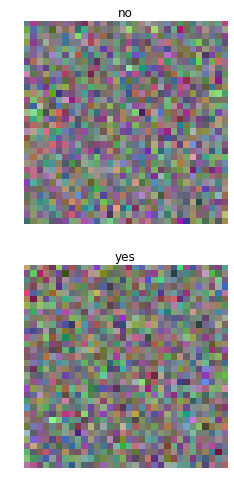

In [10]:
# Visualize the learned weights for each class
w = best_softmax.W[:,:-1] # strip out the bias
w = w.reshape(2, 32, 32, 3)

w_min, w_max = np.min(w), np.max(w)

classes = ['no', 'yes']
for i in xrange(2):
  plt.subplot(2, 1, i + 1)
  
  # Rescale the weights to be between 0 and 255
  wimg = 255.0 * (w[i].squeeze() - w_min) / (w_max - w_min)
  plt.imshow(wimg.astype('uint8'))
  plt.axis('off')
  plt.title(classes[i])

In [11]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_test_pred)

In [12]:
cnf_matrix

array([[165,  43],
       [ 51, 141]])